# Installing the required packages

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline


# Read the data

In [3]:
df = pd.read_csv(
    r"C:\Users\Harsh\College\ML-Assignments\Data Sets\MLK\Social_Network_Ads.csv"
)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Drop the User ID column

df.drop("User ID", axis=1, inplace=True)


In [5]:
df = pd.get_dummies(data=df, columns=["Gender"], drop_first=True)

In [6]:
df.head()


,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


# EDA

<Axes: xlabel='Gender_Male', ylabel='count'>

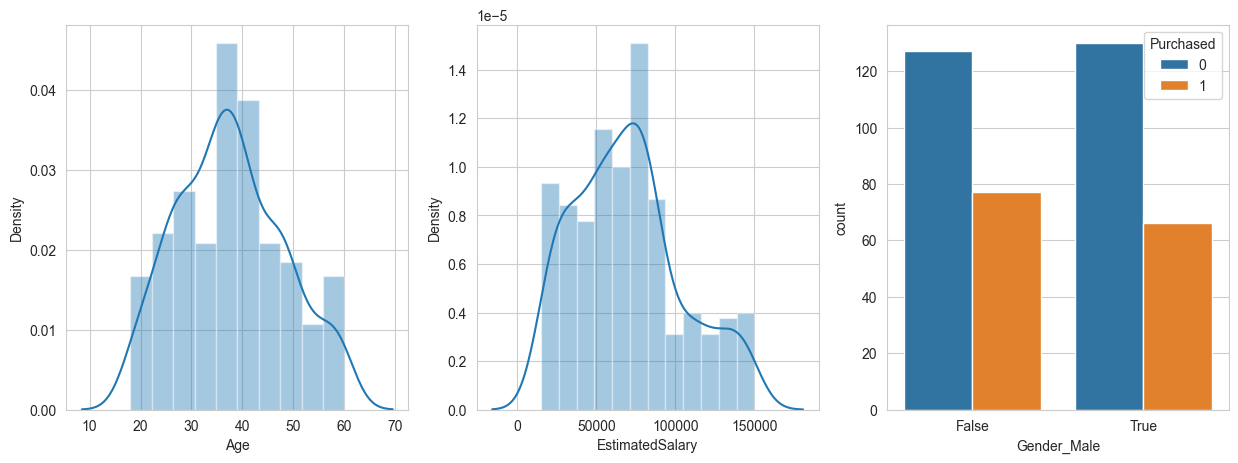

In [7]:
# Exploratory Data Analysis (EDA) for the features

# Making 3 subplots

# Adding a professional style to plots

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting the Age distribution

sns.distplot(df["Age"], ax=axes[0])

# Plotting the Estimated Salary distribution

sns.distplot(df["EstimatedSalary"], ax=axes[1])

# Plotting the Purchased distribution

sns.countplot(x="Gender_Male", data=df, hue="Purchased", ax=axes[2])

> #### We can see that the Age and Estimated Salary are normally distributed

> #### We can see from barplot that Male customers are more likely to purchase the product

<Axes: xlabel='Purchased', ylabel='Age'>

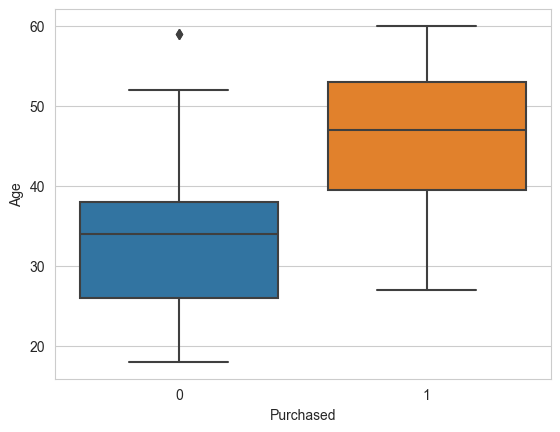

In [8]:
# Plotting the Age with Purchased

sns.boxplot(x="Purchased", y="Age", data=df)

> #### The average age of the people who purchased the product is higher than the people who didn't purchase the product.


<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

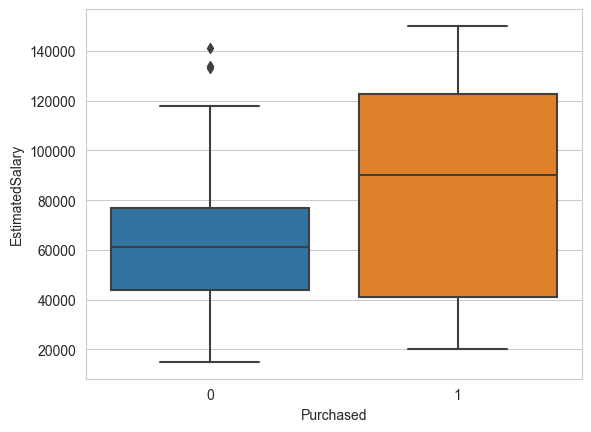

In [9]:
# Plotting the Estimated Salary with Purchased

sns.boxplot(x="Purchased", y="EstimatedSalary", data=df)

> #### Average salary of the people who purchased the product is higher than the people who didn't purchase the product.

# Modeling

In [10]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]


In [11]:
# Splittin the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [12]:
# Importing classifiers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Importing metrics

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
)

# Creating a list of model name and models
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(n_estimators=200)),
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier(verbosity=0)),
    ("CatBoost", CatBoostClassifier(verbose=0)),
]

In [13]:
# Creating a dataframe to store the results
results = {}

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Training Set Score": model.score(X_train, y_train),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC Score": roc_auc_score(y_test, y_pred),
    }

# Printing the results
results = pd.DataFrame(results).T * 100
results.sort_values(by="ROC AUC Score", ascending=False)

,Training Set Score,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
CatBoost,95.67,92.00,87.18,91.89,89.47,91.98
Gaussian Naive Bayes,86.00,92.00,93.94,83.78,88.57,90.30
Random Forest,99.67,90.00,86.49,86.49,86.49,89.27
XGBoost,99.00,89.00,84.21,86.49,85.33,88.48
Decision Tree,99.67,86.00,81.08,81.08,81.08,84.98
KNN,88.00,82.00,80.65,67.57,73.53,79.02
SVM,77.33,75.00,83.33,40.54,54.55,67.89
Logistic Regression,64.67,63.00,0.00,0.00,0.00,50.00


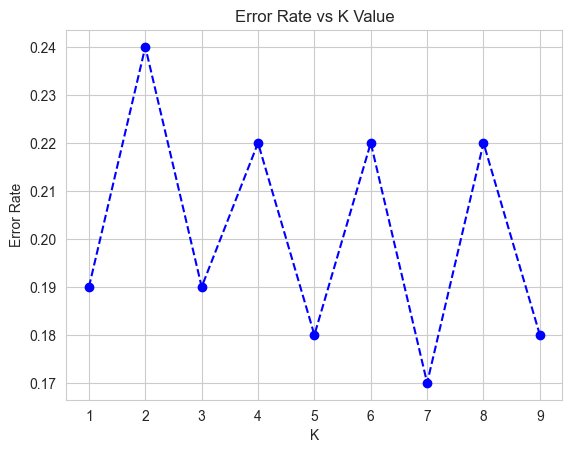

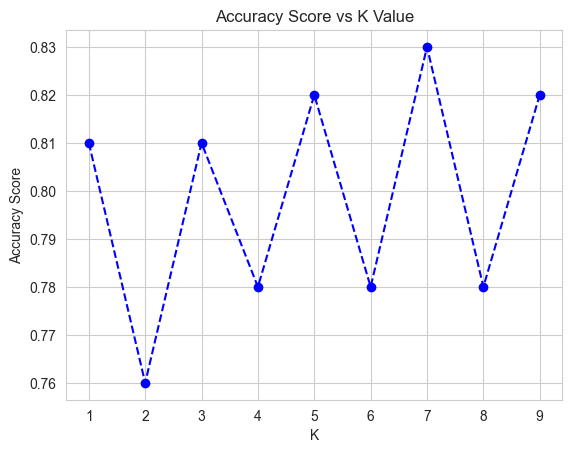

In [14]:
# Creating elbow plot to find best value of K using error rate

error_rate = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    pass


plt.plot(range(1, 10), error_rate, color="blue", linestyle="dashed", marker="o")
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()


# Creating elbow plot to find best value of K using accuracy score

acc = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc.append(np.mean(pred_i == y_test))
    pass


plt.plot(range(1, 10), acc, color="blue", linestyle="dashed", marker="o")
plt.title("Accuracy Score vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy Score")
plt.show()

In [15]:
# Creating KNN model with K=7

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Printing the results

print("Accuracy Score: ", accuracy_score(y_test, y_pred) * 100)
print("Precision Score: ", precision_score(y_test, y_pred) * 100)
print("Recall Score: ", recall_score(y_test, y_pred) * 100)
print("F1 Score: ", f1_score(y_test, y_pred) * 100)
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred) * 100)


Accuracy Score:  83.0
Precision Score:  85.71428571428571
Recall Score:  64.86486486486487
F1 Score:  73.84615384615384
ROC AUC Score:  79.25782925782926


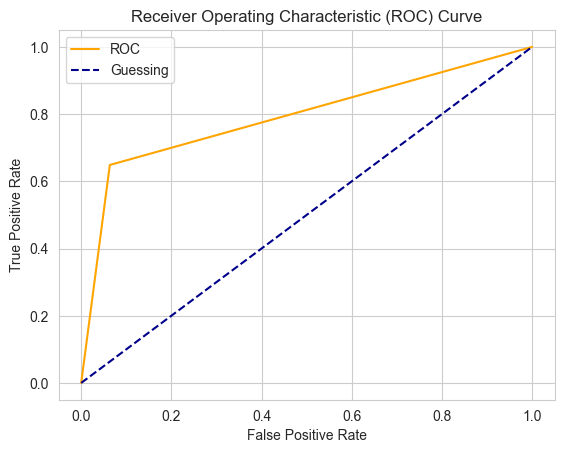

In [16]:
# Plotting ROC AUC curve for KNN

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [25]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:00<00:00, 31.87it/s]

[LightGBM] [Info] Number of positive: 106, number of negative: 194
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 300, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353333 -> initscore=-0.604419
[LightGBM] [Info] Start training from score -0.604419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [26]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.95,0.95,0.95,0.95,0.01
NuSVC,0.94,0.94,0.94,0.94,0.02
SVC,0.93,0.94,0.94,0.93,0.02
KNeighborsClassifier,0.93,0.93,0.93,0.93,0.02
LabelPropagation,0.93,0.93,0.93,0.93,0.01
LabelSpreading,0.93,0.93,0.93,0.93,0.01
GaussianNB,0.93,0.92,0.92,0.93,0.01
XGBClassifier,0.90,0.90,0.90,0.90,0.04
LGBMClassifier,0.90,0.90,0.90,0.90,0.05
